<a href="https://colab.research.google.com/github/orangegreen212/Clusters/blob/main/K_Means%2C_DBSCAN_and_Hierarchy_Clustering_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means, DBSCAN and Hierarchy Clustering

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# 1. Create the DataFrame 'data'
data_dict = pd.read_csv('/content/drive/MyDrive/Data for GC/Mall_Customers.xls')
data = pd.DataFrame(data_dict)

print("Original Data (first few rows):")
print(data)
print("\n")



Original Data (first few rows):
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]




# 2. Data Preparation for Clustering for K-Means method

Using Elbow method find the numbers of clusters

In [5]:
from sklearn import preprocessing
features = data[['Age', 'Spending Score (1-100)']]
x=features.copy()
x_scaled=preprocessing.scale(x)
#x_scaled

In [6]:
wcss=[]
for  i in range(1,10):
  kmeans=KMeans(i)

  kmeans.fit(x_scaled)
  wcss.append(kmeans.inertia_)
wcss

[400.00000000000006,
 189.3874903399244,
 124.33553836009898,
 89.76521676586151,
 71.63236065357833,
 53.46219840062966,
 46.07892920754878,
 43.03849628130415,
 34.13747648193752]

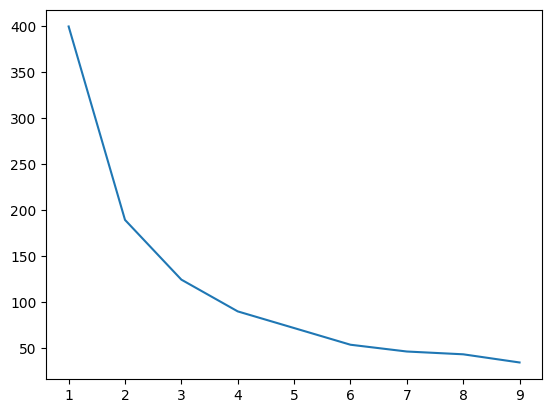

In [7]:
plt.plot(range(1,10),wcss)

Text(0, 0.5, 'Spending Score (1-100)')

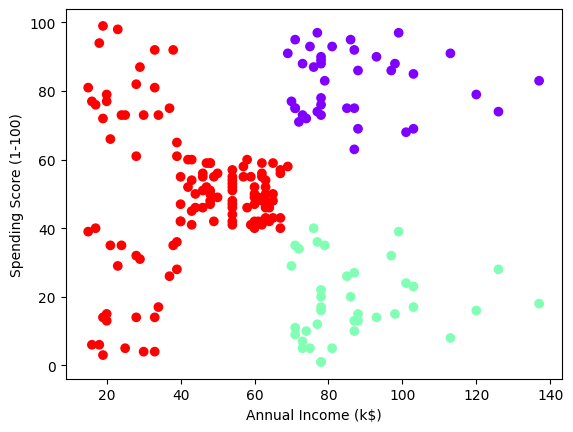

In [8]:
#  K-Means Clustering 'Annual Income (k$)' 'Spending Score (1-100)
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]
x=features.copy()

kmeans=KMeans(3)
clusters=x.copy()
clusters['cluster_pred']=kmeans.fit_predict(x)
plt.scatter(clusters['Annual Income (k$)'],clusters['Spending Score (1-100)'], c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

**Conclusion:**  Distinct customer segments are evident.

**Focus:** The high-income, low-spending group (red).

**Action:** Investigate why they're not spending and implement targeted strategies to increase their engagement and spending.

Text(0, 0.5, 'Spending Score (1-100)')

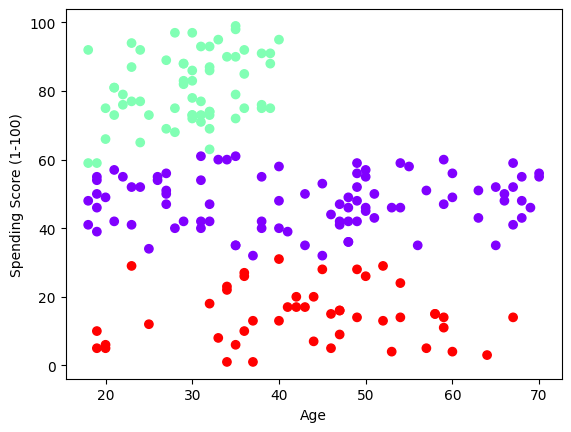

In [9]:
#  K-Means Clustering 'Age' and 'Spending Score (1-100)
features = data[['Age', 'Spending Score (1-100)']]
x=features.copy()

kmeans=KMeans(3)
clusters=x.copy()
clusters['cluster_pred']=kmeans.fit_predict(x)
plt.scatter(clusters['Age'],clusters['Spending Score (1-100)'], c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

**Conclusion:** Age significantly segments customer spending habits.

**Focus:** The diverse age group demonstrating moderate spending (red).

**Action:** Implement targeted marketing and offers to understand their needs better and elevate their spending to match the high-spending younger segment

In [10]:
from sklearn import preprocessing
x_scaled=preprocessing.scale(x)
#x_scaled

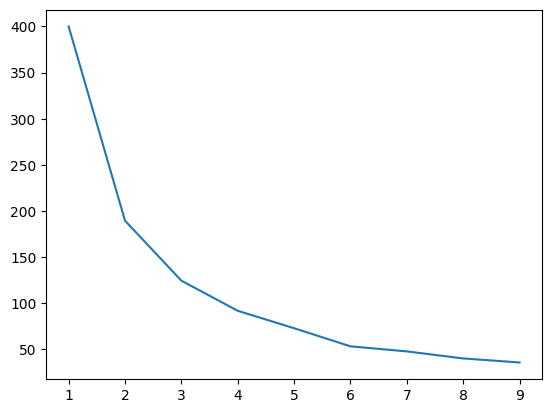

In [11]:
wcss=[]
for  i in range(1,10):
  kmeans=KMeans(i)

  kmeans.fit(x_scaled)
  wcss.append(kmeans.inertia_)
wcss
plt.plot(range(1,10),wcss)

Text(0, 0.5, 'Annual Income (k$))')

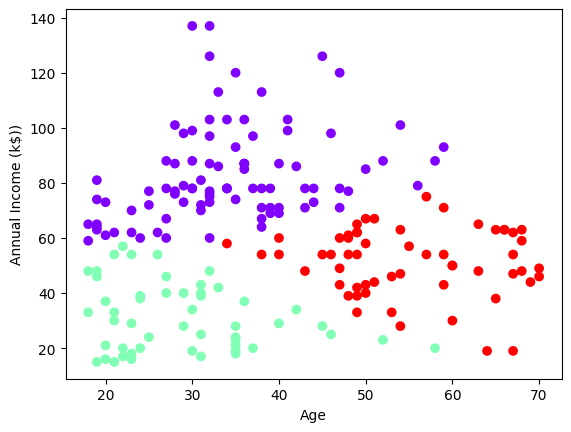

In [12]:
#  K-Means Clustering 'Annual Income (k$)' and 'Age'
features = data[['Age', 'Annual Income (k$)']]
x=features.copy()

kmeans=KMeans(3)
clusters=x.copy()
clusters['cluster_pred']=kmeans.fit_predict(x)
plt.scatter(clusters['Age'],clusters['Annual Income (k$)'], c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$))')

**Conclusion:** Age significantly influences income clustering.

**Focus:** The moderate-income, diverse-age group (red).

**Action:** Develop age-specific strategies for this group to address their varied financial needs and unlock potential.

# DBSCANS

In [13]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

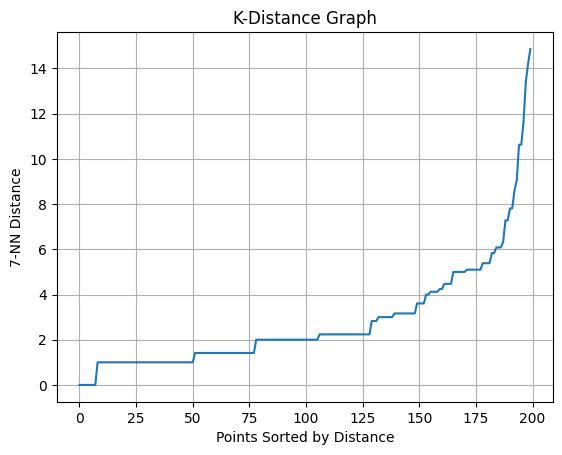

In [14]:
# Assuming you are clustering based on Income and Spending Score
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features) # Use scaled data for distance calculations

knn = NearestNeighbors(n_neighbors = 7)
model = knn.fit(features)
distances, indices = knn.kneighbors(features)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.grid()
plt.plot(distances);
plt.xlabel('Points Sorted by Distance')
plt.ylabel('7-NN Distance')
plt.title('K-Distance Graph');


In [15]:
db = DBSCAN(eps = 5, min_samples = 8).fit(features)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_


# Number of clusters in labels, ignoring noise if present

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Number of Clusters : ', n_clusters_)
print('Number of Outliers : ', n_noise_)

data['Spending Score (1-100)'] = labels; data['Spending Score (1-100)'] = labels

Number of Clusters :  2
Number of Outliers :  120


Estimated number of clusters: 2
Unique labels found: {np.int64(0), np.int64(1), np.int64(-1)}


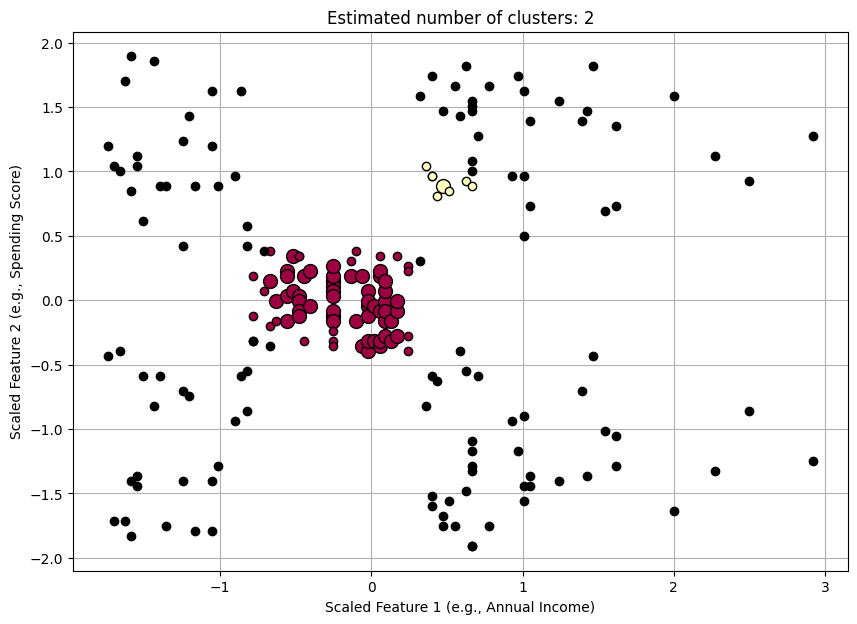

In [16]:
unique_labels = set(labels)
n_clusters_ = len(unique_labels) - (1 if -1 in labels else 0)

print(f"Estimated number of clusters: {n_clusters_}")
print(f"Unique labels found: {unique_labels}")
features_scaled = scaler.fit_transform(features)
# Или так (если вы потом конвертировали в numpy):
features_scaled_np = np.array(features_scaled)
# Define colors for clusters
# Check if unique_labels is empty before generating colors
if not unique_labels:
    print("No labels found, cannot plot.")
else:
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

    plt.figure(figsize=(10, 7))

    # Iterate through each unique label (cluster ID)
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise points.
            col = [0, 0, 0, 1] # Black color for noise

        # Create a mask for points belonging to the current cluster k
        class_member_mask = (labels == k)

        # --- Plot Core Samples ---
        # Select core samples using the SCALED NUMPY ARRAY
        core_samples_k = features_scaled_np[class_member_mask & core_samples_mask]
        if core_samples_k.shape[0] > 0:
            # Plot using NumPy slicing on the resulting NumPy array
            plt.plot(core_samples_k[:, 0], core_samples_k[:, 1],
                     'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=10)

        # --- Plot Non-Core Samples ---
        # Select non-core samples using the SCALED NUMPY ARRAY
        non_core_samples_k = features_scaled_np[class_member_mask & ~core_samples_mask]
        if non_core_samples_k.shape[0] > 0:
             # Plot using NumPy slicing on the resulting NumPy array
            plt.plot(non_core_samples_k[:, 0], non_core_samples_k[:, 1],
                     'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

    plt.title("Estimated number of clusters: %d" % n_clusters_)
    plt.xlabel("Scaled Feature 1 (e.g., Annual Income)") # Label appropriately
    plt.ylabel("Scaled Feature 2 (e.g., Spending Score)") # Label appropriately
    plt.grid(True)
    plt.show()

**Conclusion:** The data forms two primary clusters, with many points remaining unclustered (outliers).

**Focus:** The large, dense purple cluster.

**Action:** Investigate the common characteristics of this dominant purple cluster to understand and target this core segment effectively. Simultaneously, analyze the smaller yellow cluster and outliers to identify potential niche opportunities or data anomalies.

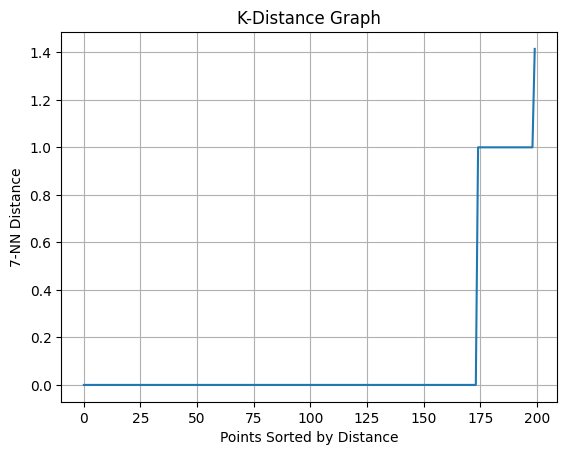

In [17]:
# Assuming you are clustering based on Income and Spending Score
features = data[['Age', 'Spending Score (1-100)']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features) # Use scaled data for distance calculations

knn = NearestNeighbors(n_neighbors = 7)
model = knn.fit(features)
distances, indices = knn.kneighbors(features)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.grid()
plt.plot(distances);
plt.xlabel('Points Sorted by Distance')
plt.ylabel('7-NN Distance')
plt.title('K-Distance Graph');

In [18]:
db = DBSCAN(eps = 1, min_samples = 8).fit(features)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_


# Number of clusters in labels, ignoring noise if present

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Number of Clusters : ', n_clusters_)
print('Number of Outliers : ', n_noise_)

data['Spending Score (1-100)'] = labels; data['Spending Score (1-100)'] = labels

Number of Clusters :  4
Number of Outliers :  39


Estimated number of clusters: 4
Unique labels found: {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(-1)}


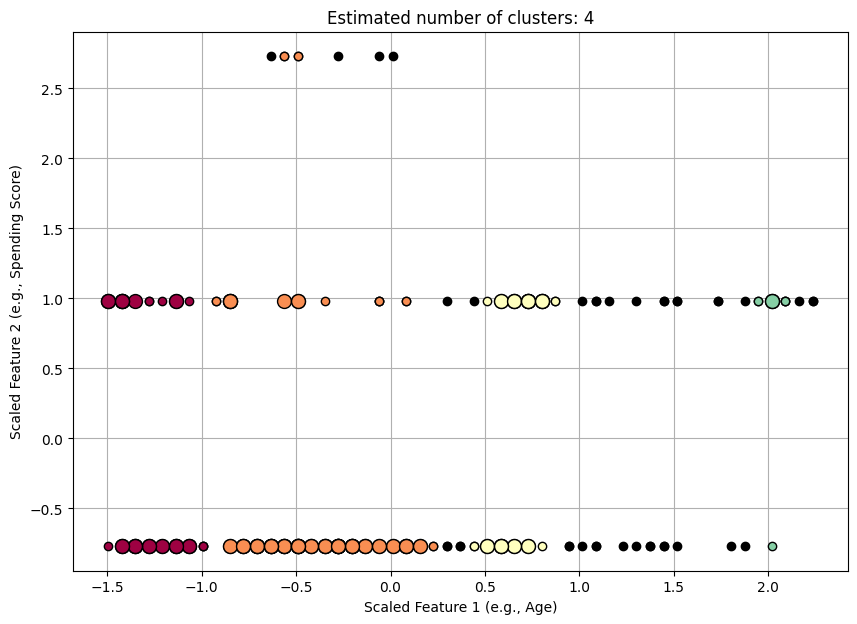

In [19]:
unique_labels = set(labels)
n_clusters_ = len(unique_labels) - (1 if -1 in labels else 0)

print(f"Estimated number of clusters: {n_clusters_}")
print(f"Unique labels found: {unique_labels}")

features_scaled = scaler.fit_transform(features)
# Или так (если вы потом конвертировали в numpy):
features_scaled_np = np.array(features_scaled)
# Define colors for clusters
# Check if unique_labels is empty before generating colors
if not unique_labels:
    print("No labels found, cannot plot.")
else:
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

    plt.figure(figsize=(10, 7))

    # Iterate through each unique label (cluster ID)
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise points.
            col = [0, 0, 0, 1] # Black color for noise

        # Create a mask for points belonging to the current cluster k
        class_member_mask = (labels == k)

        # --- Plot Core Samples ---
        # Select core samples using the SCALED NUMPY ARRAY
        core_samples_k = features_scaled_np[class_member_mask & core_samples_mask]
        if core_samples_k.shape[0] > 0:
            # Plot using NumPy slicing on the resulting NumPy array
            plt.plot(core_samples_k[:, 0], core_samples_k[:, 1],
                     'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=10)

        # --- Plot Non-Core Samples ---
        # Select non-core samples using the SCALED NUMPY ARRAY
        non_core_samples_k = features_scaled_np[class_member_mask & ~core_samples_mask]
        if non_core_samples_k.shape[0] > 0:
             # Plot using NumPy slicing on the resulting NumPy array
            plt.plot(non_core_samples_k[:, 0], non_core_samples_k[:, 1],
                     'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

    plt.title("Estimated number of clusters: %d" % n_clusters_)
    plt.xlabel("Scaled Feature 1 (e.g., Age)") # Label appropriately
    plt.ylabel("Scaled Feature 2 (e.g., Spending Score)") # Label appropriately
    plt.grid(True)
    plt.show()

**Conclusion:** Four distinct customer segments are identified based on age and spending score.

**Focus:** The younger age group with lower spending scores (dark purple/red cluster, bottom-left).

**Action:** Investigate the reasons for their lower spending and implement targeted initiatives to increase their engagement and transaction value.

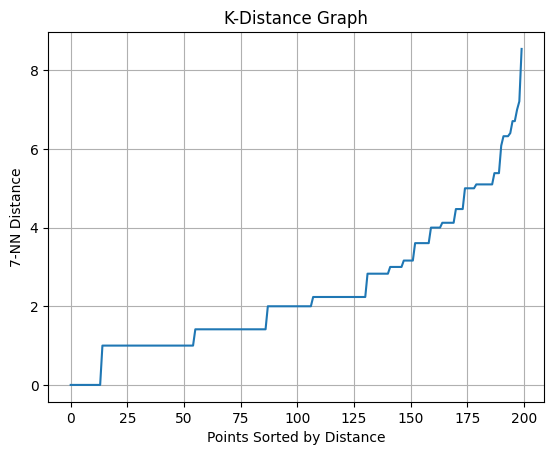

In [20]:
# --- Select and Scale Features ---
# Assuming you are clustering based on Income and Spending Score
features = data[['Age', 'Annual Income (k$)']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features) # Use scaled data for distance calculations

knn = NearestNeighbors(n_neighbors = 7)
model = knn.fit(features)
distances, indices = knn.kneighbors(features)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.grid()
plt.plot(distances);
plt.xlabel('Points Sorted by Distance')
plt.ylabel('7-NN Distance')
plt.title('K-Distance Graph');

In [21]:
db = DBSCAN(eps = 3, min_samples = 8).fit(features)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_


# Number of clusters in labels, ignoring noise if present

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Number of Clusters : ', n_clusters_)
print('Number of Outliers : ', n_noise_)

data['Annual Income (k$)'] = labels; data['Annual Income (k$)'] = labels

Number of Clusters :  1
Number of Outliers :  187


Estimated number of clusters: 1
Unique labels found: {np.int64(0), np.int64(-1)}


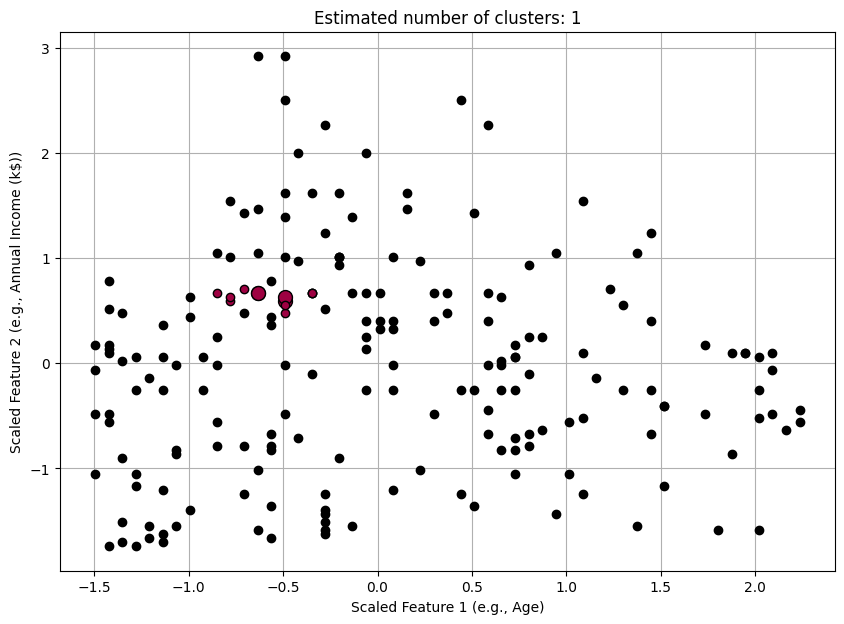

In [22]:
unique_labels = set(labels)
n_clusters_ = len(unique_labels) - (1 if -1 in labels else 0)

print(f"Estimated number of clusters: {n_clusters_}")
print(f"Unique labels found: {unique_labels}")
# Возможно, ваша строка выглядит так:
features_scaled = scaler.fit_transform(features)
# Или так (если вы потом конвертировали в numpy):
features_scaled_np = np.array(features_scaled)
# Define colors for clusters
# Check if unique_labels is empty before generating colors
if not unique_labels:
    print("No labels found, cannot plot.")
else:
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

    plt.figure(figsize=(10, 7))

    # Iterate through each unique label (cluster ID)
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise points.
            col = [0, 0, 0, 1] # Black color for noise

        # Create a mask for points belonging to the current cluster k
        class_member_mask = (labels == k)

        # --- Plot Core Samples ---
        # Select core samples using the SCALED NUMPY ARRAY
        core_samples_k = features_scaled_np[class_member_mask & core_samples_mask]
        if core_samples_k.shape[0] > 0:
            # Plot using NumPy slicing on the resulting NumPy array
            plt.plot(core_samples_k[:, 0], core_samples_k[:, 1],
                     'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=10)

        # --- Plot Non-Core Samples ---
        # Select non-core samples using the SCALED NUMPY ARRAY
        non_core_samples_k = features_scaled_np[class_member_mask & ~core_samples_mask]
        if non_core_samples_k.shape[0] > 0:
             # Plot using NumPy slicing on the resulting NumPy array
            plt.plot(non_core_samples_k[:, 0], non_core_samples_k[:, 1],
                     'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

    plt.title("Estimated number of clusters: %d" % n_clusters_)
    plt.xlabel("Scaled Feature 1 (e.g., Age)") # Label appropriately
    plt.ylabel("Scaled Feature 2 (e.g., Annual Income (k$))") # Label appropriately
    plt.grid(True)
    plt.show()

**Conclusion**: The algorithm identifies only one small, dense cluster, leaving most data points unclustered.

**Focus:** The single identified cluster (purple/red dots).

**Action:** Deeply analyze the characteristics of this small, distinct group. Simultaneously, re-evaluate the clustering approach or parameters, as the current model doesn't effectively segment the majority of the data.

# Hierarchical Clustering

Generating Dendrogram...


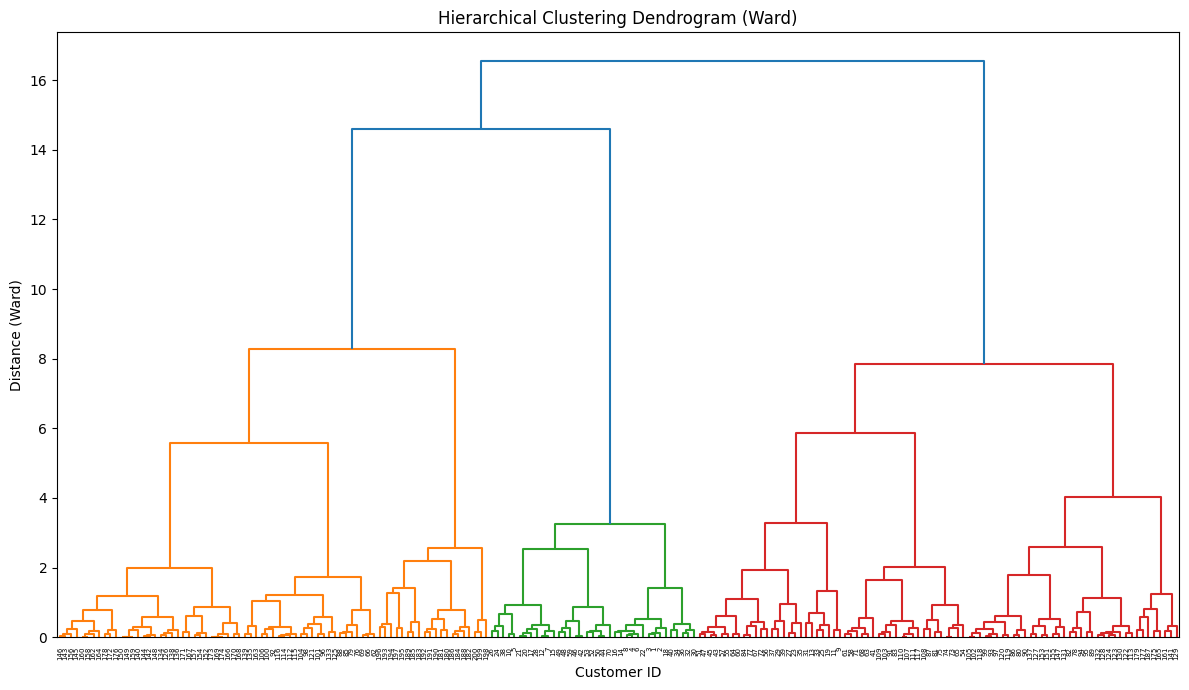

In [23]:
# First, let's visualize the dendrogram to see the merging process
# Ensure features_scaled is defined and is a NumPy array
if 'features_scaled' not in locals() or not isinstance(features_scaled, np.ndarray):
     print("Error: 'features_scaled' (NumPy array of scaled data) not found. Please run scaling first.")
     # Add placeholder or exit if necessary, depending on your script structure
     # For now, let's assume it exists based on the attempt below
else:
    print("Generating Dendrogram...")
    linked = linkage(features_scaled, method='ward') # linkage uses the scaled data

    plt.figure(figsize=(12, 7)) # Increased figure size for better readability
    dendrogram(linked,
                orientation='top',
                labels=data['CustomerID'].values, # Optional: label leaves
                distance_sort='descending',
                show_leaf_counts=True)
    plt.title('Hierarchical Clustering Dendrogram (Ward)')
    plt.xlabel('Customer ID') # Label leaves are Customer IDs
    plt.ylabel('Distance (Ward)')
    plt.xticks(rotation=90) # Rotate labels if they overlap
    plt.tight_layout() # Adjust layout
    plt.show() # Display the dendrogram

    # --- Perform clustering specifying the number of clusters ---
    # CORRECTED: Removed the 'affinity' argument

    agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')

    # Fit and predict using the scaled features
    hierarchical_labels = agg_clustering.fit_predict(features_scaled)
    data['Hierarchical_Cluster'] = hierarchical_labels


**Conclusion:** The dendrogram reveals distinct customer groupings, with roughly 3-4 primary segments emerging.

**Focus:** The orange cluster on the left. It's one of the earliest and largest distinct branches.

**Action:** Analyze the characteristics of customers within this "orange" segment to understand their common traits and tailor strategies. Then, examine the "green" and "red" branches for further, more granular segmentation.

# PCA Clustering


In [24]:
from sklearn.decomposition import PCA
data_dict = pd.read_csv('/content/drive/MyDrive/Data for GC/Mall_Customers.xls')
data = pd.DataFrame(data_dict)


In [25]:
features_pca = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

print("Step 1: Selected Features for PCA")
print(features_pca.head())
print("\n")

Step 1: Selected Features for PCA
   Age  Annual Income (k$)  Spending Score (1-100)
0   19                  15                      39
1   21                  15                      81
2   20                  16                       6
3   23                  16                      77
4   31                  17                      40




In [26]:

features_pca = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Initialize the StandardScaler
scaler_pca = StandardScaler()

# Fit the scaler to the features and transform them
scaled_features_pca = scaler_pca.fit_transform(features_pca)


Step 3: Explained Variance Analysis
Explained variance by component: [0.44266167 0.33308378 0.22425454]
Cumulative explained variance: [0.44266167 0.77574546 1.        ]




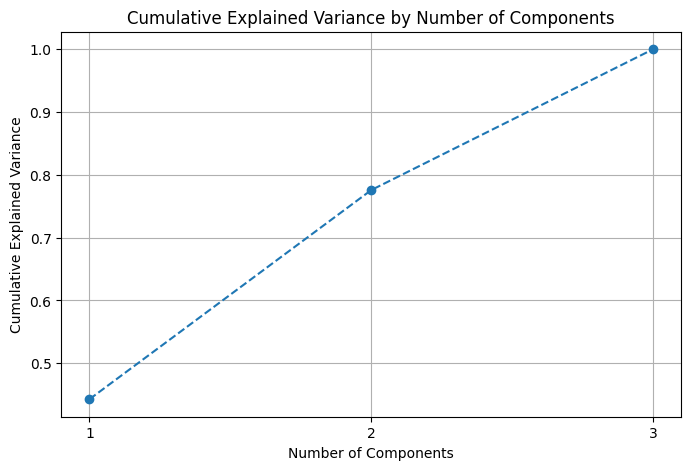

In [ ]:
# Initialize PCA - without specifying n_components initially
# This will compute components for all features (3 in this case)
pca_analyzer = PCA()

# Fit PCA to the scaled data
pca_analyzer.fit(scaled_features_pca)

# Calculate the explained variance ratio for each component
explained_variance = pca_analyzer.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("Step 3: Explained Variance Analysis")
print(f"Explained variance by component: {explained_variance}")
print(f"Cumulative explained variance: {cumulative_variance}")
print("\n")

# Plot the cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.grid(True)
plt.show()

In [27]:
# Choose the number of components (e.g., 2 for visualization)
n_components = 2

# Initialize PCA with the desired number of components
pca_reducer = PCA(n_components=n_components)

# Fit PCA to the scaled data AND transform the data to the new PCA space
principal_components = pca_reducer.fit_transform(scaled_features_pca)

print(f"Step 4: Data Transformed into {n_components} Principal Components")
print(f"Shape of the transformed data: {principal_components.shape}")
# print(principal_components[:5]) # Print first 5 rows (optional)
print("\n")

Step 4: Data Transformed into 2 Principal Components
Shape of the transformed data: (200, 2)




In [28]:
# Create column names for the principal components
pc_columns = [f'PC{i+1}' for i in range(n_components)] # e.g., ['PC1', 'PC2']

# Create the DataFrame
pca_df = pd.DataFrame(data=principal_components, columns=pc_columns)

# You can optionally add back other columns (like CustomerID or Gender) for context
# Make sure indices align if you do this
pca_df['CustomerID'] = data['CustomerID']
pca_df['Gender'] = data['Gender']
# If you have cluster labels, you could add them too:
# pca_df['Cluster'] = data['Some_Cluster_Label']


print("Step 5: DataFrame with Principal Components")
print(pca_df.head())
print("\n")

Step 5: DataFrame with Principal Components
        PC1       PC2  CustomerID  Gender
0 -0.615720 -1.763481           1    Male
1 -1.665793 -1.820747           2    Male
2  0.337862 -1.674799           3  Female
3 -1.456573 -1.772430           4  Female
4 -0.038465 -1.662740           5  Female




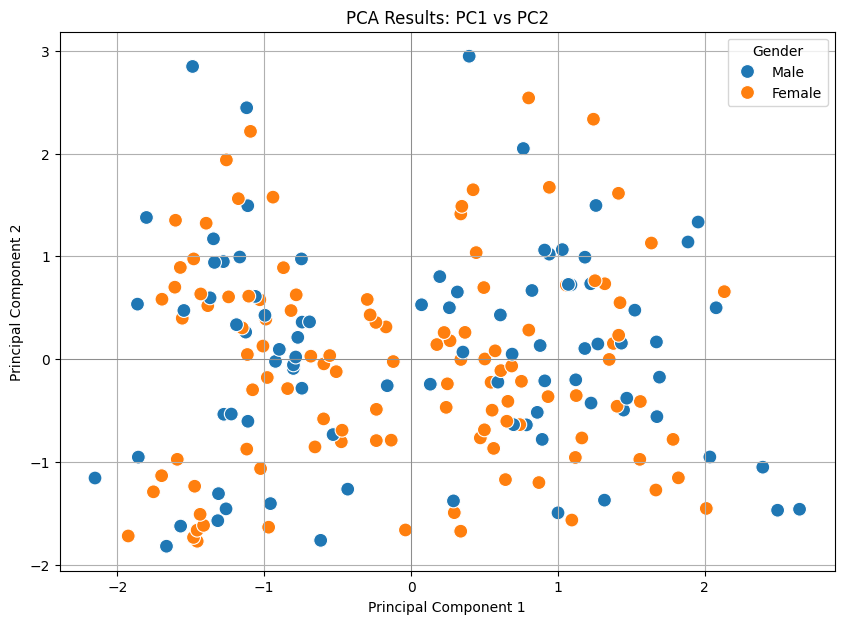

In [29]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Gender', s=100) # <-- Используйте pca_df!
plt.title('PCA Results: PC1 vs PC2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.show()

**Conclusion:** PCA shows significant overlap between male and female customers in the PC1/PC2 space.

**Focus:** The overall intermingled distribution.

**Action:** Recognize that these first two principal components do not strongly differentiate customers by gender. If gender-specific strategies are needed, other features or components must be explored, or gender should be combined with other segmentation variables.

Preparing for 3D PCA visualization...
Data transformed into 3 principal components for 3D.
Shape of the transformed data: (200, 3)


PCA DataFrame with 'Gender' column (first 5 rows):
        PC1       PC2       PC3  Gender
0 -0.615720 -1.763481 -1.324232    Male
1 -1.665793 -1.820747 -0.069952    Male
2  0.337862 -1.674799 -2.179025  Female
3 -1.456573 -1.772430 -0.078029  Female
4 -0.038465 -1.662740 -0.687342  Female


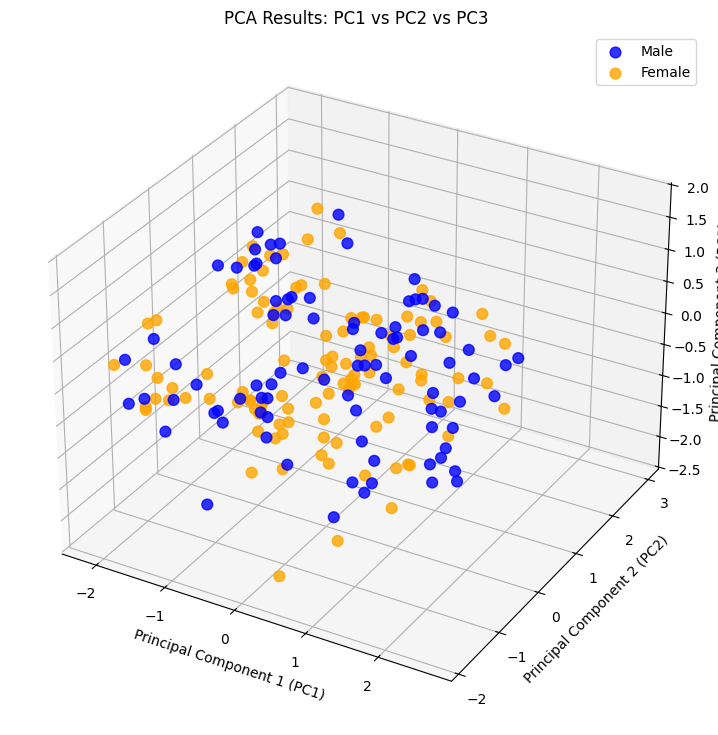

In [32]:
import pandas as pd # Make sure pandas is imported
import matplotlib.pyplot as plt # Make sure matplotlib.pyplot is imported
from mpl_toolkits.mplot3d import Axes3D # For 3D plots
from sklearn.preprocessing import StandardScaler # Added for StandardScaler
from sklearn.decomposition import PCA

print("Preparing for 3D PCA visualization...")

# 1. Select the same features as for 2D PCA (or others if you prefer)
# Ensure the DataFrame 'data' exists and contains the necessary columns
if 'data' not in locals() and 'data' not in globals():
    print("ERROR: Original DataFrame 'data' not found. Load the data.")
    # You can stop execution if data is not defined
    # exit()
    principal_components_3d = None # Initialize to prevent further errors if data is missing
    n_components_3d = 0
else:
    try:
        features_for_3d_pca = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

        # 2. Scale the features
        scaler_3d_pca = StandardScaler()
        scaled_features_3d_pca = scaler_3d_pca.fit_transform(features_for_3d_pca)

        # 3. Define the number of components for 3D
        n_components_3d = 3  # <--- IMPORTANT: setting 3 components

        # 4. Initialize and apply PCA
        pca_reducer_3d = PCA(n_components=n_components_3d)
        principal_components_3d = pca_reducer_3d.fit_transform(scaled_features_3d_pca) # <--- CREATING THE REQUIRED VARIABLE

        print(f"Data transformed into {n_components_3d} principal components for 3D.")
        print(f"Shape of the transformed data: {principal_components_3d.shape}")
        print("\n")

    except KeyError as e:
        print(f"ERROR: One of the columns for PCA was not found in DataFrame 'data': {e}")
        principal_components_3d = None # Set to None so subsequent code doesn't crash or handles it
        n_components_3d = 0      # Similarly
    except NameError as e: # This case should be less likely if the outer 'if' for 'data' works
        print(f"ERROR: {e}. DataFrame 'data' might not be defined.")
        principal_components_3d = None
        n_components_3d = 0

# First, create column names for the principal components
# n_components_3d should now be defined
pc_columns_3d = [f'PC{i+1}' for i in range(n_components_3d)] # e.g., ['PC1', 'PC2', 'PC3']

# Then, create a DataFrame for the PCA results
# Make sure 'principal_components_3d' is defined above!
try:
    # Check if principal_components_3d is defined (for more robustness)
    if 'principal_components_3d' not in locals() and 'principal_components_3d' not in globals():
        raise NameError("Variable 'principal_components_3d' is not defined. Ensure PCA was performed.")
    if principal_components_3d is None and n_components_3d == 0: # Check if it was set to None due to earlier error
         raise ValueError("principal_components_3d is None, likely due to an error in PCA step.")

    pca_3d_df = pd.DataFrame(data=principal_components_3d, columns=pc_columns_3d)
except (NameError, ValueError) as e:
    print(f"ERROR when creating pca_3d_df: {e}")
    pca_3d_df = None
    # exit() # or raise

if pca_3d_df is not None:
    # Attempt to add the 'Gender' column for coloring the points
    try:
        # Check if the DataFrame 'data' is defined
        if 'data' not in locals() and 'data' not in globals():
            raise NameError("Original DataFrame 'data' is not defined.")

        # Check if the length of the PCA DataFrame matches the original data DataFrame
        if len(pca_3d_df) == len(data): # Assumes 'data' is your original DataFrame
            # Add the 'Gender' column. Using .values helps avoid index mismatch issues.
            pca_3d_df['Gender'] = data['Gender'].values
            print("PCA DataFrame with 'Gender' column (first 5 rows):")
            print(pca_3d_df.head()) # Let's look at the result
        else:
            print(f"Error: Length of pca_3d_df ({len(pca_3d_df)}) does not match length of data ({len(data)}). Cannot add Gender properly.")
            pca_3d_df['Gender'] = 'Unknown' # Add a placeholder

    except NameError as e: # If 'data' is not defined
        print(f"ERROR when adding Gender: {e}")
        pca_3d_df['Gender'] = 'Unknown'
    except KeyError:
        print("Error: 'Gender' column not found in the original DataFrame 'data'.")
        pca_3d_df['Gender'] = 'Unknown' # Add a placeholder
    except Exception as e:
        print(f"An unexpected error occurred while adding 'Gender': {e}")
        pca_3d_df['Gender'] = 'Unknown' # Add a placeholder


    # --- Step 5: Visualize in 3D ---
    fig = plt.figure(figsize=(12, 9)) # Increase figure size for 3D
    ax = fig.add_subplot(111, projection='3d')

    # Define unique genders present in the PCA DataFrame
    genders = pca_3d_df['Gender'].unique()

    # Define colors for each gender
    # Manual color mapping (can be extended if more genders/categories)
    color_map = {'Male': 'blue', 'Female': 'orange', 'Unknown': 'grey'}

    # Plot points for each gender separately to get a proper legend
    for gender in genders:
        gender_data = pca_3d_df[pca_3d_df['Gender'] == gender]
        if not gender_data.empty:
            ax.scatter(gender_data['PC1'], gender_data['PC2'], gender_data['PC3'],
                       c=color_map.get(gender, 'black'), # Color for the gender (default to black if not in map)
                       label=gender,                     # Label for the legend
                       s=60,                             # Marker size
                       alpha=0.8                         # Slight transparency
                      )

    # Set axis labels and title
    ax.set_xlabel('Principal Component 1 (PC1)')
    ax.set_ylabel('Principal Component 2 (PC2)')
    ax.set_zlabel('Principal Component 3 (PC3)')
    ax.set_title('PCA Results: PC1 vs PC2 vs PC3')

    # Add the legend
    ax.legend()

    # Show the plot
    plt.show()
else:
    print("Visualization is not possible because pca_3d_df was not created due to previous errors.")